## Final Project Submission

Please fill out:
* Student name: Leticia D Fernandes
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Abhineet
* Blog post URL:


In [1]:
import sqlite3
import pandas as pd
import csv

In [2]:
data = pd.read_csv('data/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
data.info()
#first off, I see that there is missing data, specifically in the yr_renovated, waterfront, floors


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
data.yr_renovated
#I can see that we have both 0 and NaN entered in this column. The year renovated entered as 0 
#likely indicating that it was not renovated.
#I will fill NaN with 0 and transform this variable into a categorical renovated or not-renovated
data['yr_renovated'] = data.yr_renovated.fillna(0)

#I will only choose the homes that were renovated in the last 20 years, reflecting a 
#recent renovation and therefore an expected increase in value.

ren_selection = data.yr_renovated>=2001
data.yr_renovated[ren_selection]=1.0
data.yr_renovated[~ren_selection]=0.0

data.rename(columns={'yr_renovated':'is_renovated'})

<ipython-input-4-cec89e463345>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.yr_renovated[ren_selection]=1.0
<ipython-input-4-cec89e463345>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.yr_renovated[~ren_selection]=0.0


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,is_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,0.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [5]:
#I will check that this categorization makes sense by comparing the average value of renovated vs
#non-renovated houses. I see that the renovated houses have a 1.5 times higher average value.
data[data.yr_renovated==1.0]['price'].mean()/data[data.yr_renovated==0.0]['price'].mean()

1.5571717868925934

In [6]:
#for the waterfront data, I will first check that the 1 does in fact correspond to a waterfront property"
import folium
water_front = data[data.waterfront==1]
points = zip(water_front.lat,water_front.long)

lat = water_front.lat.mean()
long = water_front.long.mean()
base_map = folium.Map([lat, long], zoom_start=11)
for p in points:
    lat = p[0]
    long = p[1]
    marker = folium.Marker(location=[lat, long])
    marker.add_to(base_map)
base_map
#These do look as thoghy they correspond to waterfront properties.


In [7]:
#fill the NaN values with
#zero, assuming they are not on the waterfront.
data['waterfront']=data['waterfront'].fillna(0)

In [8]:
data.duplicated(subset=['id']).sum()
#I noticed that there are 177 repeated records based on ID

177

In [9]:
#I will sort the data by date and keep only the most recent record.
data = data.sort_values(by=['date']).reset_index()
data=data.drop('index',axis=1)
data = data.drop_duplicates(subset=['id'],keep='last')

In [10]:
data.duplicated(subset=['id']).sum()
#Here I confirm that our duplicated ID's have been removed, 
#and keeping only the most recent record.

0

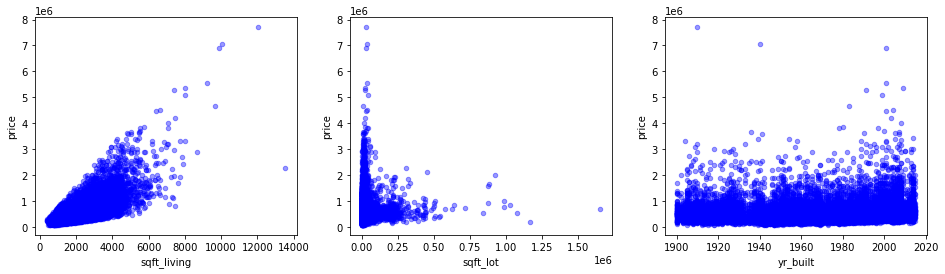

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(16,4))
for xcol, ax in zip(['sqft_living', 'sqft_lot', 'yr_built'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')
#plot the price of of the house against the continuous predictors. I notice that 
#ithere are outliers in these data, such as a house with an extremely large square footage in living space or lot.
# will exclude these points as outliers.
data = data.drop(data[data.sqft_lot>600000].index)
data = data.drop(data[data.sqft_living>13000].index)

In [12]:
#I can see that sqft_living is very nicely correlated with price. The relationship between 
#sqft_lot and price looks negatively correlated or possibly no correlation. There looks like there is no correlation 
#between price and yr_built

#should I keep yr_built? 
#does sqft lot has any correlation? should i keep it?

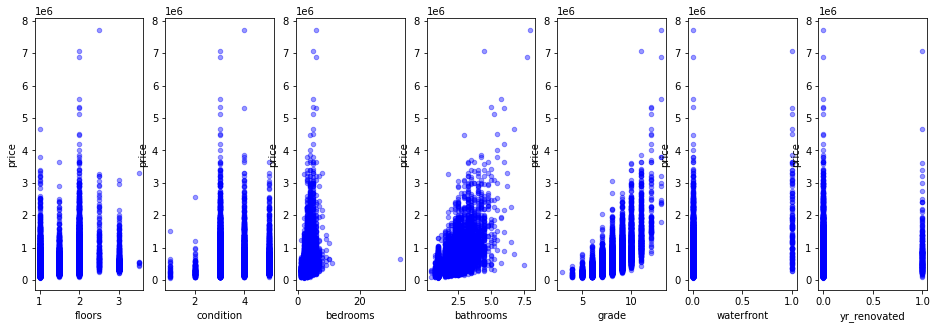

In [13]:
fig, axes = plt.subplots(nrows=1,ncols=7, figsize=(16,5))

for xcol, ax in zip(['floors', 'condition', 'bedrooms', 'bathrooms','grade','waterfront','yr_renovated'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')
#plotting the independent variable against our categorical predictors.
#I notice that there is an outlier in terms of bedrooms and exclude any house listed with more than 
#20 bedrooms.
# We notice that bedrooms, bathrooms, and grade appear to be correlated nicely wiht price. It looks like floors and condition are not.
#the waterfront and yr_renovated are not conclucisve from this visualization
data = data.drop(data[data.bedrooms>=30].index)

In [14]:
#Here I investigate wether there is any correlation between predictor variables
#To avoid the negative effects of colinearity, I will set the cutoff at 0.75. Note 
#I also use 1 as the upper bound, as every variable will by definition correlate with itself 
#perfectly.
data.corr().abs()>0.75
df = data.corr().abs().stack().reset_index().sort_values(0,ascending=False)
df['pairs'] = list(zip(df.level_0,df.level_1))
df=df.drop(columns=['level_0','level_1'])
df=df.set_index('pairs')
df.columns=['cc']
df.query('cc>0.75 and cc<1')

,cc
pairs,
"(sqft_living, sqft_above)",0.875843
"(sqft_above, sqft_living)",0.875843
"(sqft_lot, sqft_lot15)",0.771439
"(sqft_lot15, sqft_lot)",0.771439
"(sqft_living, grade)",0.763082
"(grade, sqft_living)",0.763082
"(sqft_living15, sqft_living)",0.757728
"(sqft_living, sqft_living15)",0.757728
"(sqft_above, grade)",0.756130


In [15]:
#I can see that sqft_above,sqft_lot15 are heavily correlated with another predictor adn will be 
#elimineated. I will also drop zipcode, lat, long, and view, as they are not correlated with price.
data.drop(
    labels=['zipcode','sqft_basement','sqft_above',
           'sqft_living15','sqft_lot15','long','lat','view'],
    axis=1,
    inplace=True)


In [16]:
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated
id,1.000000,-0.017552,0.002102,0.005397,-0.011920,-0.147289,0.018544,-0.003690,-0.024267,0.007458,0.021455,-0.007008
price,-0.017552,1.000000,0.316717,0.524985,0.701754,0.090672,0.255010,0.265369,0.035105,0.666984,0.051490,0.102848
bedrooms,0.002102,0.316717,1.000000,0.528673,0.594939,0.040534,0.183098,-0.002124,0.022570,0.367760,0.160471,0.033728
bathrooms,0.005397,0.524985,0.528673,1.000000,0.754467,0.092481,0.501569,0.063861,-0.129359,0.665088,0.506464,0.058123
sqft_living,-0.011920,0.701754,0.594939,0.754467,1.000000,0.189146,0.352187,0.105390,-0.061423,0.763082,0.316719,0.046939
sqft_lot,-0.147289,0.090672,0.040534,0.092481,0.189146,1.000000,-0.013772,0.028208,-0.009805,0.123988,0.062048,-0.015629
floors,0.018544,0.255010,0.183098,0.501569,0.352187,-0.013772,1.000000,0.020619,-0.266815,0.457500,0.488767,0.002369
waterfront,-0.003690,0.265369,-0.002124,0.063861,0.105390,0.028208,0.020619,1.000000,0.016619,0.083112,-0.024835,0.016169
condition,-0.024267,0.035105,0.022570,-0.129359,-0.061423,-0.009805,-0.266815,0.016619,1.000000,-0.150382,-0.365148,-0.070154
grade,0.007458,0.666984,0.367760,0.665088,0.763082,0.123988,0.457500,0.083112,-0.150382,1.000000,0.445788,0.031905


<AxesSubplot:>

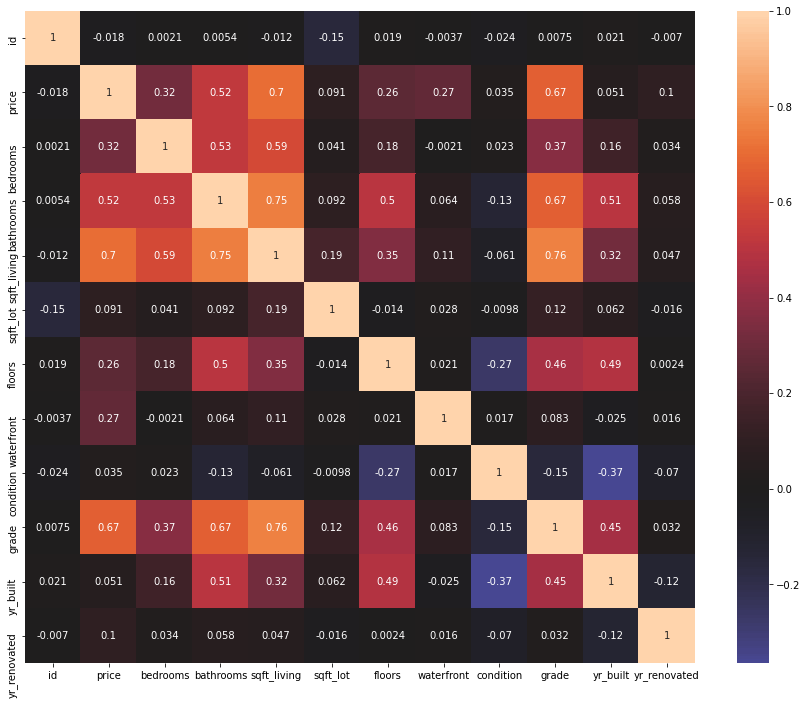

In [17]:
import seaborn as sns
plt.figure(figsize=(15,12))
sns.heatmap(data=data.corr(), center=0, annot=True)
#I notice form our correlation matrix that sqft_lot, condition, and yr_built are very poorly correlated with price.

In [18]:
#I have looked at the date column and established that the prices appears to 
#be affected by the season. I will implement a categorical variable to handle this.
#The variable will be one-hot encoded and will indicate summer or not-summer.

date_df=pd.to_datetime(data.date).dt.weekofyear
selection = date_df.between(20,32,inclusive=True)

date_df[selection]=1.0
date_df[~selection]=0.0

data['is_summer']=date_df

data=data.drop('date',axis=1)


<ipython-input-18-ca25cf197ac2>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  date_df=pd.to_datetime(data.date).dt.weekofyear


In [19]:
#define our categorical data
categoricals =['bedrooms','floors','waterfront','condition','grade']

#I noticed that there are not many houses with greator than 6 bedrooms, since there is not
#sufficient data to train our model obove this value, I will drop those houses
data = data.drop(data[data['bedrooms']>6].index)


#I see also that there are not many houses with a grade below 5 and above 12. I will restrict our analysis
#to houses wiht grades between these values
data = data[(data.grade>=5) & (data.grade<=12)]

#The grade values are most commonly in the ranges 5-7, 7-9,9-12
#These data will be bineed into these three ranges
data['grade_bins']=pd.cut(data.grade, bins=(5,6,7,9,12),labels=('dropped','fair','good','excellent'))

bed_dummies = pd.get_dummies(data.bedrooms,prefix='beds',drop_first=True)
grade_dummies = pd.get_dummies(data.grade_bins,prefix='grade',drop_first=True)




In [21]:
#I see that the year built is a categorical variable that does not appear to correlate well with price.
#I will bin this variable and create dummies
#data['yr_bins']=pd.cut(data.yr_built, bins=(1900,1952,1975,1997,2015),labels=('dropped','old','mid','new'))
#yr_dummies = pd.get_dummies(data.yr_bins,prefix='age',drop_first=True)

In [22]:
data=data.drop(['id','bedrooms','grade','yr_built','yr_renovated','grade_bins',],axis=1)

In [23]:
preprocessed = pd.concat([data,bed_dummies, grade_dummies], axis=1)
preprocessed.head()

,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,is_summer,beds_2,beds_3,beds_4,beds_5,beds_6,grade_fair,grade_good,grade_excellent
0,325000.0,2.5,2240,5105,2.0,0.0,4,0,0,0,1,0,0,0,1,0
1,330000.0,2.5,2240,7589,2.0,0.0,3,0,0,0,1,0,0,0,1,0
2,265000.0,1.5,1740,12728,1.0,0.0,4,0,0,0,1,0,0,1,0,0
3,359000.0,2.5,1820,11325,1.0,0.0,3,0,0,0,1,0,0,0,1,0
4,435000.0,2.5,2060,10125,2.0,0.0,4,0,0,0,1,0,0,1,0,0


In [24]:
preprocessed

,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,is_summer,beds_2,beds_3,beds_4,beds_5,beds_6,grade_fair,grade_good,grade_excellent
0,325000.0,2.50,2240,5105,2.0,0.0,4,0,0,0,1,0,0,0,1,0
1,330000.0,2.50,2240,7589,2.0,0.0,3,0,0,0,1,0,0,0,1,0
2,265000.0,1.50,1740,12728,1.0,0.0,4,0,0,0,1,0,0,1,0,0
3,359000.0,2.50,1820,11325,1.0,0.0,3,0,0,0,1,0,0,0,1,0
4,435000.0,2.50,2060,10125,2.0,0.0,4,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,550000.0,1.50,1730,5750,1.0,0.0,3,0,0,1,0,0,0,1,0,0
21593,975000.0,2.50,2720,11049,2.0,0.0,3,0,0,0,1,0,0,0,0,1
21594,520000.0,1.75,1340,1368,2.0,0.0,3,0,1,0,0,0,0,1,0,0
21595,344950.0,1.75,1870,7500,1.0,0.0,5,0,0,1,0,0,0,0,1,0


<AxesSubplot:>

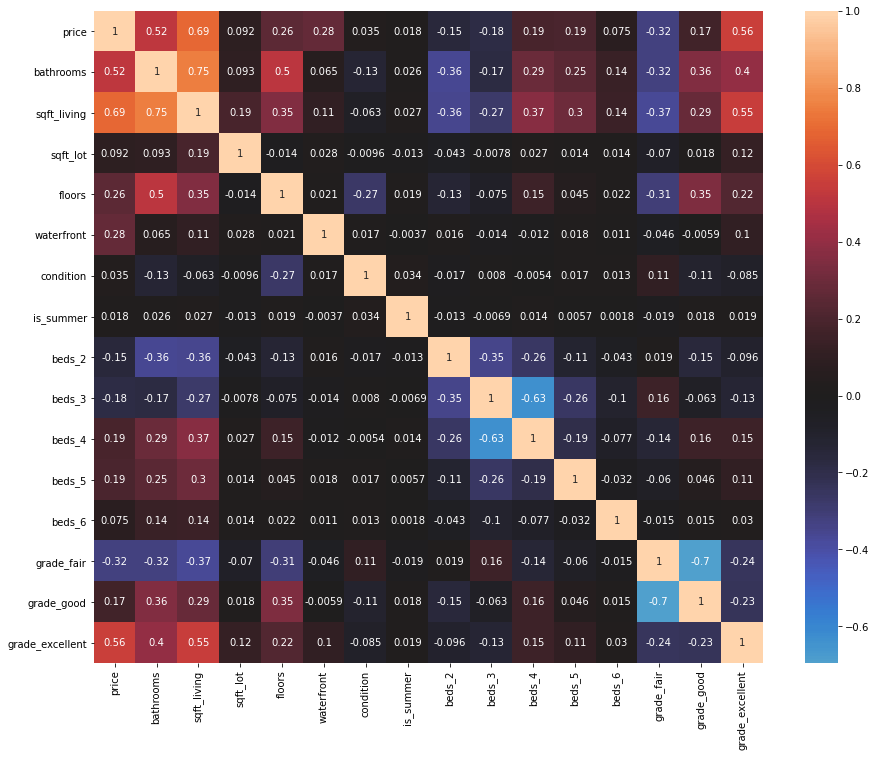

In [25]:
plt.figure(figsize=(15,12))
sns.heatmap(data=preprocessed.corr(), center=0, annot=True)

In [26]:
#I will separate the data into train and test subsets using a 70/30 split
preprocessed_train=preprocessed.drop(data.sample(frac=0.3,random_state=1).index)
preprocessed_test =preprocessed.sample(frac=0.3,random_state=1)

In [27]:
predictors=preprocessed_train.columns[1:]
outcome = 'price'
formula = outcome + '~' + '+'.join(predictors)
formula

'price~bathrooms+sqft_living+sqft_lot+floors+waterfront+condition+is_summer+beds_2+beds_3+beds_4+beds_5+beds_6+grade_fair+grade_good+grade_excellent'

In [28]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

predictors=preprocessed_train.columns[1:]

outcome = 'price'
formula = outcome + '~' + '+'.join(predictors)

model = ols(formula=formula, data=preprocessed_train).fit()

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     1479.
Date:                Sun, 29 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:46:34   Log-Likelihood:            -2.0503e+05
No. Observations:               14912   AIC:                         4.101e+05
Df Residuals:                   14896   BIC:                         4.102e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.214e+05   2.28e+04     -5.328      0.000   -1.66e+05   -7.67e+04
bathrooms        -794.3506   4188.001     -0.190      0.850   -9003.348    7414.647
sqft_living       215.1379      4.049     53.133      0.000     207.201     223.074
sqft_lot           -0.5763      0.058     -9.948      0.000      -0.690      -0.463
floors           2983.6710   4284.552      0.696      0.486   -5414.579    1.14e+04
waterfront       7.912e+05   2.32e+04     34.082      0.000    7.46e+05    8.37e+05
condition         6.08e+04   2989.800     20.336      0.000    5.49e+04    6.67e+04
is_summer        -430.5077   4065.017     -0.106      0.916   -8398.441    7537.426
beds_2           5651.6236   2.01e+04      0.281      0.779   -3.38e+04    4.51e+04
beds_3          -8.227e+04   1.99e+04     -4.126      0.000   -1.21e+05   -4.32e+04
beds_4          -1.221e+05   2.04e+04     -5.994      0.000   -1.62e+05   -8.22e+04
beds_5          -9.648e+04   2.16e+04     -4.461      0.000   -1.39e+05   -5.41e+04
beds_6          -1.562e+05   2.64e+04     -5.916      0.000   -2.08e+05   -1.04e+05
grade_fair        3.31e+04   6976.880      4.744      0.000    1.94e+04    4.68e+04
grade_good       1.144e+05   8092.481     14.141      0.000    9.86e+04     1.3e+05
grade_excellent  4.483e+05   1.25e+04     35.755      0.000    4.24e+05    4.73e+05
==============================================================================
Omnibus:                     7571.909   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           139632.100
Skew:                           2.010   Prob(JB):                         0.00
Kurtosis:                      17.442   Cond. No.                     9.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""